Linear Regression

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [13]:
fish = pd.read_csv("./data/fish.csv")
fish.head()
#fish.describe()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [14]:
x_height = fish['Height']
x_width = fish['Width']
y_weight = fish['Weight']

Text(0.5, 0, 'Weight')

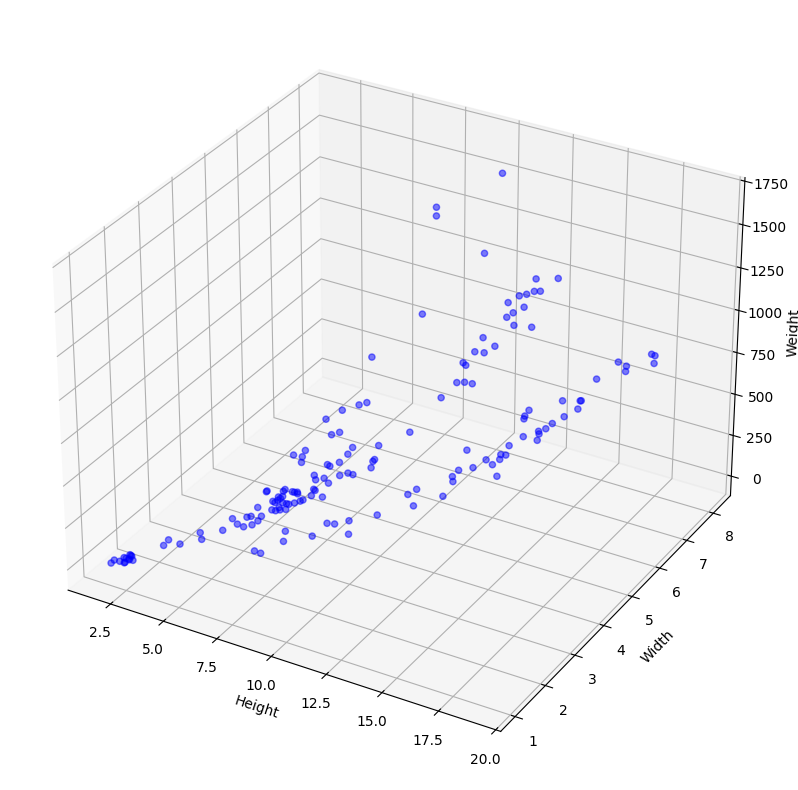

In [15]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_height, x_width, y_weight,c='blue', marker='o', alpha=0.5)
ax.set_xlabel('Height')
ax.set_ylabel('Width')
ax.set_zlabel('Weight')


In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = np.column_stack((x_height, x_width))
Y = y_weight

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

model = LinearRegression().fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

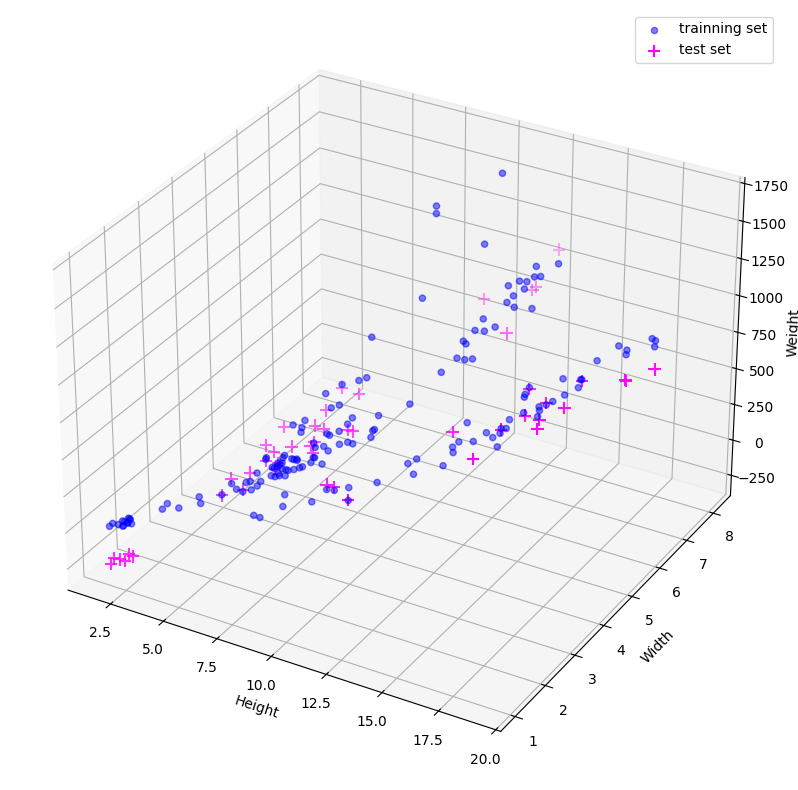

In [20]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_height, x_width, y_weight, c='blue', marker='o', alpha=0.5, label="trainning set")

ax.scatter(X_test[:,0], X_test[:,1], y_pred_test, c='magenta', marker='+', s=80, label="test set")

ax.set_xlabel('Height')
ax.set_ylabel('Width')
ax.set_zlabel('Weight')
ax.legend()

Predict new value

The fish with height 10 and width 8 has a weight of 1068.1123260157347


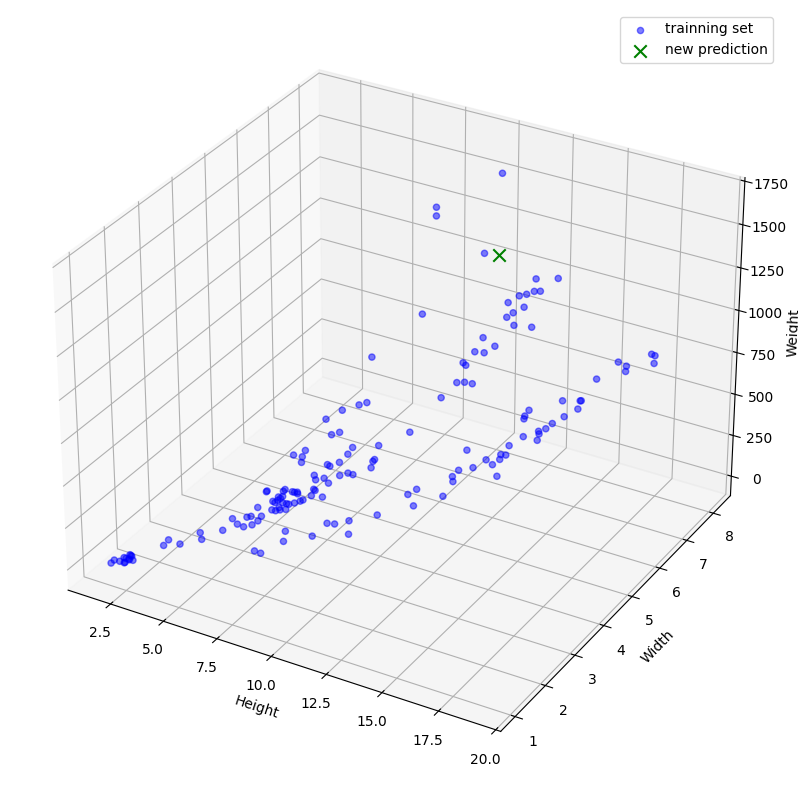

In [21]:
y_pred_new = model.predict([[10, 8]])

fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_height, x_width, y_weight, c='blue', marker='o', alpha=0.5, label="trainning set")

ax.scatter(10, 8, y_pred_new, c='green', marker='x', s=80, label="new prediction")

ax.set_xlabel('Height')
ax.set_ylabel('Width')
ax.set_zlabel('Weight')
ax.legend()

print("The fish with height 10 and width 8 has a weight of", y_pred_new[0])

Model Quality

In [22]:
from sklearn.metrics import mean_absolute_error

trainning_set_MAE = mean_absolute_error(y_train, y_pred_train)
test_set_MAE = mean_absolute_error(y_test, y_pred_test)

print('Trainning set MAE', trainning_set_MAE)
print('Test set MAE', test_set_MAE)

Trainning set MAE 116.58749280928038
Test set MAE 110.74140162429484


Polynomial Regression